<a href="https://colab.research.google.com/github/DhruPithadia/DhruPithadia-DataScience-GenAI-repo/blob/main/Assignment_6/Week7SeminarExercises_COMPLETED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part A: EDA of Salary Data

Starting off by importing the relevant libraries and the `EDA-DP.csv` file:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from google.colab import files
upload = files.upload()

Saving EDA-DP.csv to EDA-DP.csv


Importing the file to pandas and printing the first 5 rows using the '.head' function:

In [3]:
df = pd.read_csv('EDA-DP.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


I will now get a concise summary of the DataFrame, including data types and non-null values, using `df.info()` to understand its structure:


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


Next, I will generate descriptive statistics for numerical columns and count unique values for categorical columns, I will first use `df.describe()` and then iterate through the DataFrame columns, printing the unique count for columns with 'object' dtype.



In [5]:
print("Descriptive statistics for numerical columns:")
print(df.describe())

print("\nUnique value counts for categorical columns:")
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Column '{col}': {df[col].nunique()} unique values")

Descriptive statistics for numerical columns:
          work_year        salary  salary_in_usd  remote_ratio
count  16534.000000  1.653400e+04   16534.000000  16534.000000
mean    2023.226866  1.637270e+05  149686.777973     32.003750
std        0.713558  3.402057e+05   68505.293156     46.245158
min     2020.000000  1.400000e+04   15000.000000      0.000000
25%     2023.000000  1.017630e+05  101125.000000      0.000000
50%     2023.000000  1.422000e+05  141300.000000      0.000000
75%     2024.000000  1.872000e+05  185900.000000    100.000000
max     2024.000000  3.040000e+07  800000.000000    100.000000

Unique value counts for categorical columns:
Column 'experience_level': 4 unique values
Column 'employment_type': 4 unique values
Column 'job_title': 155 unique values
Column 'salary_currency': 23 unique values
Column 'employee_residence': 88 unique values
Column 'company_location': 77 unique values
Column 'company_size': 3 unique values


Next, I am going to identify and report any missing values across all columns in the dataset:


In [6]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


## Visualising the Salary Distribution

I will visualise the salary distribution in USD, as the normal salary column is in different currencies so cannot be compared. To visualise the distribution of `salary_in_usd`, I will create a histogram with a Kernel Density Estimate (KDE) using `sns.histplot`, add appropriate titles and labels for clarity, and then display the plot.


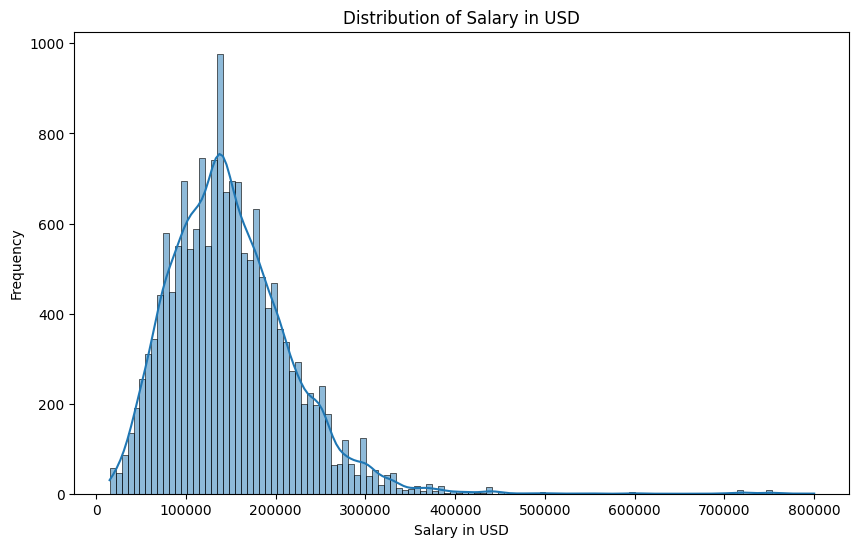

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], kde=True)
plt.title('Distribution of Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

Looking at the distribution above, it is very similar to a normal distribution, but also has a slight positive skew. I will find the skew, mean, median and mode of the salary in USD.

In [12]:
salary_skew = df['salary_in_usd'].skew()
salary_mean = df['salary_in_usd'].mean()
salary_median = df['salary_in_usd'].median()
salary_mode = df['salary_in_usd'].mode()

print(f"Skewness of Salary (USD): {salary_skew:.2f}")
print(f"Mean Salary (USD): {salary_mean:,.2f}")
print(f"Median Salary (USD): {salary_median:,.2f}")
print(f"Mode Salary (USD): {salary_mode.to_string(index=False)}")

Skewness of Salary (USD): 1.49
Mean Salary (USD): 149,686.78
Median Salary (USD): 141,300.00
Mode Salary (USD): 150000


## Analysing Salary by Experience Level

I am going to visualise the relationship between `salary_in_usd` and `experience_level` using box plots to compare salary distributions across different experience levels.


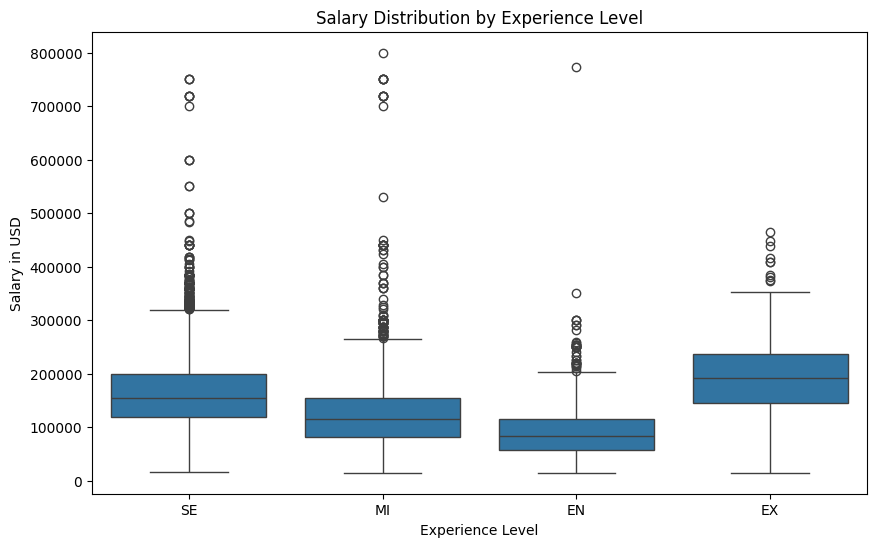

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

As I expected, the higher the experience level, the higher the median, upper quartile and lower quartile salaries. However, there are a lot of apparent upper outliers wthin the data.



## Analysing Salary by Top 10 Job Titles

I will now dentify the top 10 most frequent `job_title` categories and visualise their `salary_in_usd` distribution using box plots to understand salary variations among popular roles.



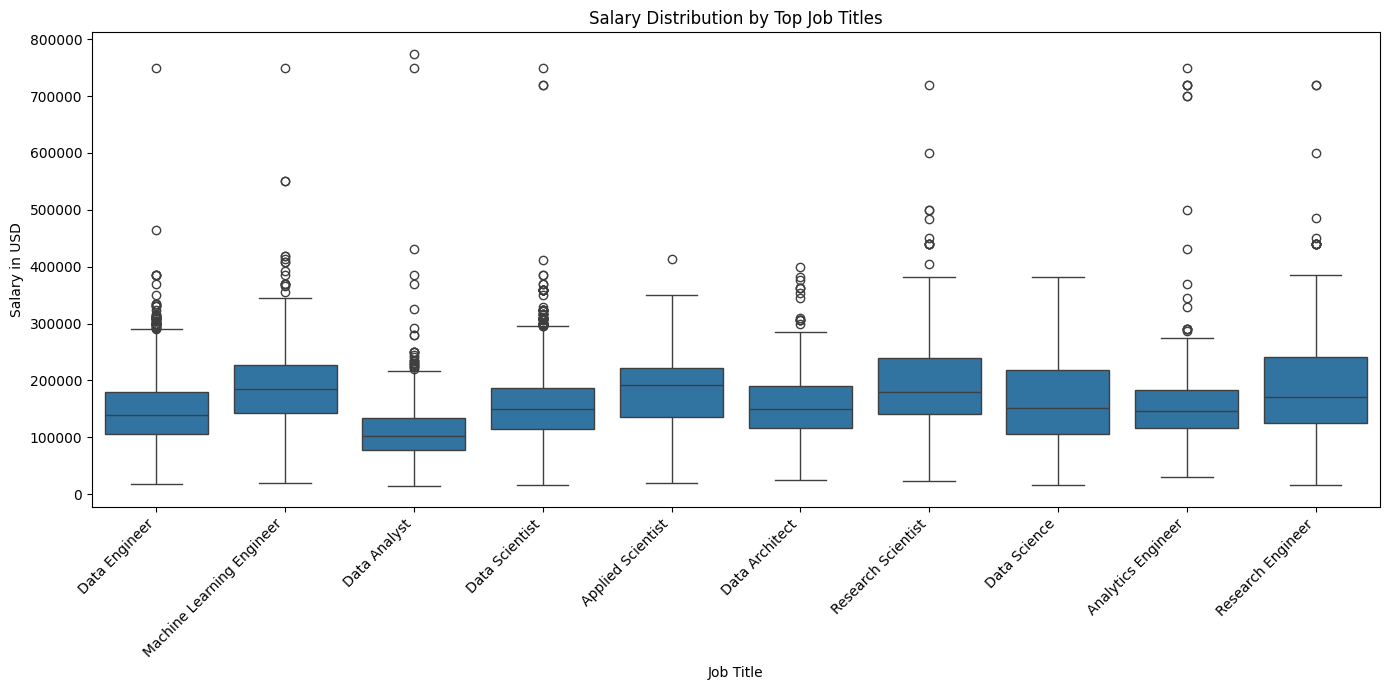

In [9]:
top_job_titles = df['job_title'].value_counts().head(10).index
df_top_jobs = df[df['job_title'].isin(top_job_titles)]

plt.figure(figsize=(14, 7))
sns.boxplot(x='job_title', y='salary_in_usd', data=df_top_jobs)
plt.title('Salary Distribution by Top Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

## Analysing Salary by Company Size

I will now visualise the relationship between `salary_in_usd` and `company_size` using box plots to compare salary distributions across different company sizes. Include appropriate labels and a legend.

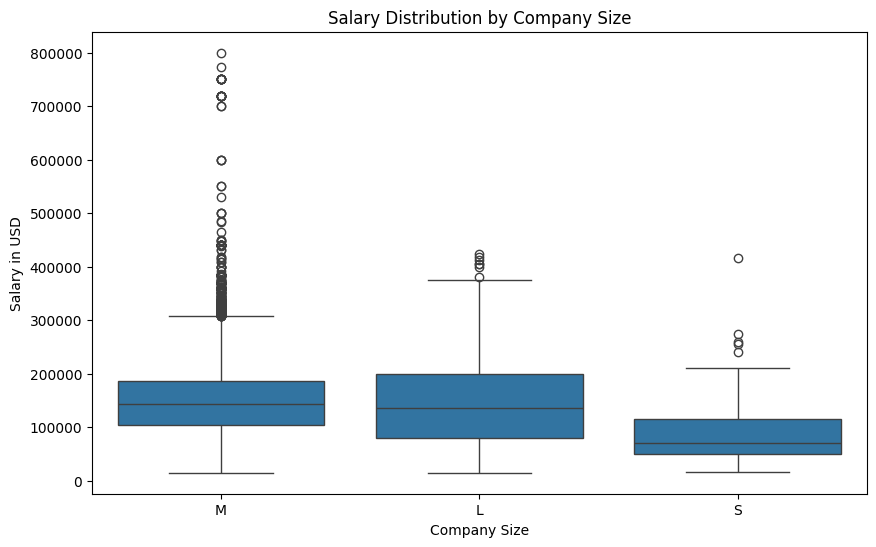

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.show()

Looking above we can see that there is more of a spread in salaries as the company size gets larger.

## Summarising the key findings and insights gained from the EDA:


### Data Analysis Key Findings

*   The dataset contains 16,534 entries and 11 columns with no missing values across any column.
*   The `salary_in_usd` column ranges from \$15,000 to \$800,000, with an average salary of approximately \$149,686.
*   The `remote_ratio` column exclusively contains values of 0, 50, and 100, representing no remote work, hybrid, and full remote work, respectively.
*   Categorical columns such as `experience_level`, `employment_type`, and `company_size` have a small number of unique values (4, 4, and 3 respectively), making them suitable for direct analysis.
*   The distribution of `salary_in_usd` shows its shape, central tendency, and spread, which is likely right-skewed as is common for salary data (inferred from the visualisation step).
*   Visualisations indicated variations in `salary_in_usd` based on `experience_level`, top 10 `job_title` categories and `company_size`. For example, salaries generally increase with higher experience levels.

### Insights or Next Steps

*   Remove  columns that are not necessary for specific predictions.
*   Given the high number of unique `job_title` categories, consider grouping similar job titles to simplify analysis and reveal broader trends in salary for specific roles or domains.


# Part B: ML Modelling

Beginning with importing the dataset:

In [14]:
from google.colab import files
upload = files.upload()

Saving loan_data.csv to loan_data.csv


Next, loading the `loan_data.csv` file into a Pandas DataFrame and separating the target variable (`loan_status`) from the features (all other columns):


In [15]:
df_loan = pd.read_csv('loan_data.csv')
X = df_loan.drop('loan_status', axis=1)
y = df_loan['loan_status']

print("df_loan head:")
print(df_loan.head())
print("\nX head:")
print(X.head())
print("\ny head:")
print(y.head())

df_loan head:
   age  years_employed  annual_income  credit_score  credit_history_years  \
0   40            17.2          25579           692                   5.3   
1   33             7.3          43087           627                   3.5   
2   42             1.1          20840           689                   8.4   
3   53             0.5          29147           692                   9.8   
4   32            12.5          63657           630                   7.2   

   savings_assets  current_debt  defaults_on_file  delinquencies_last_2yrs  \
0             895         10820                 0                        0   
1             169         16550                 0                        1   
2              17          7852                 0                        0   
3            1480         11603                 0                        1   
4             209         12424                 0                        0   

   derogatory_marks  loan_amount  interest_rate  debt_

Now, splitting the features (`X`) and target variable (`y`) into training and testing sets, using a test size of 20% and a `random_state` for reproducibility:

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (40000, 15)
X_test shape: (10000, 15)
y_train shape: (40000,)
y_test shape: (10000,)


Applying feature scaling (using StandardScaler) to the numerical features:


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of X_test_scaled: {X_test_scaled.shape}")

Shape of X_train_scaled: (40000, 15)
Shape of X_test_scaled: (10000, 15)


## Building and Evaluating a Linear Regression Model

Training a Linear Regression model on the scaled training data, making predictions on the test set, and evaluating its performance using appropriate regression metrics, while acknowledging its suitability for classification tasks:


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate and train the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_lr = linear_reg_model.predict(X_test_scaled)

# Convert continuous predictions to binary class labels using a threshold of 0.5
y_pred_lr_binary = (y_pred_lr >= 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_lr_binary)
precision = precision_score(y_test, y_pred_lr_binary)
recall = recall_score(y_test, y_pred_lr_binary)
f1 = f1_score(y_test, y_pred_lr_binary)

print(f"Linear Regression Model Performance (as Classifier):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Linear Regression Model Performance (as Classifier):
Accuracy: 0.8371
Precision: 0.8330
Recall: 0.8796
F1-Score: 0.8557


## Building and Evaluating a Logistic Regression Model

Training a Logistic Regression model on the scaled training data, making predictions on the test set, and evaluating its performance using appropriate classification metrics such as accuracy, precision, recall, and F1-score:


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate Logistic Regression model with random_state for reproducibility
log_reg_model = LogisticRegression(random_state=42)

# Train the model on the scaled training data
log_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_lr_log = log_reg_model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy_log = accuracy_score(y_test, y_pred_lr_log)
precision_log = precision_score(y_test, y_pred_lr_log)
recall_log = recall_score(y_test, y_pred_lr_log)
f1_log = f1_score(y_test, y_pred_lr_log)

print(f"Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_log:.4f}")
print(f"Precision: {precision_log:.4f}")
print(f"Recall: {recall_log:.4f}")
print(f"F1-Score: {f1_log:.4f}")

Logistic Regression Model Performance:
Accuracy: 0.8412
Precision: 0.8469
Recall: 0.8676
F1-Score: 0.8571


## Building and Evaluating a Random Forest Classifier Model

Training a Random Forest Classifier model on the scaled training data, making predictions on the test set, and evaluating its performance using appropriate classification metrics:


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate RandomForestClassifier model with random_state for reproducibility
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Random Forest Classifier Model Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

Random Forest Classifier Model Performance:
Accuracy: 0.8868
Precision: 0.8916
Recall: 0.9037
F1-Score: 0.8976


## Comparing Model Performance


To summarise and compare the model performances, I will create a Pandas DataFrame and populate it with the evaluation metrics from each model. Then, I will print the DataFrame.



In [21]:
metrics_data = {
    'Model': ['Linear Regression (as Classifier)', 'Logistic Regression', 'Random Forest Classifier'],
    'Accuracy': [accuracy, accuracy_log, accuracy_rf],
    'Precision': [precision, precision_log, precision_rf],
    'Recall': [recall, recall_log, recall_rf],
    'F1-Score': [f1, f1_log, f1_rf]
}

metrics_df = pd.DataFrame(metrics_data)

print("\nModel Performance Comparison:")
print(metrics_df.round(4))



Model Performance Comparison:
                               Model  Accuracy  Precision  Recall  F1-Score
0  Linear Regression (as Classifier)    0.8371     0.8330  0.8796    0.8557
1                Logistic Regression    0.8412     0.8469  0.8676    0.8571
2           Random Forest Classifier    0.8868     0.8916  0.9037    0.8976


## Summary:

### ML Modelling Findings

*   The data was split into training and testing sets, with 40,000 samples (80%) for training and 10,000 samples (20%) for testing, ensuring reproducibility with `random_state=42`.
*   **Linear Regression Model (as Classifier)**: Achieved an Accuracy of 0.8371, Precision of 0.8330, Recall of 0.8796, and an F1-Score of 0.8557.
*   **Logistic Regression Model**: Performed slightly better than Linear Regression, with an Accuracy of 0.8412, Precision of 0.8469, Recall of 0.8676, and an F1-Score of 0.8571.
*   **Random Forest Classifier Model**: Demonstrated superior performance across all metrics, with an Accuracy of 0.8868, Precision of 0.8916, Recall of 0.9037, and an F1-Score of 0.8976.
*   **Model Comparison**: The Random Forest Classifier consistently outperformed both Linear and Logistic Regression models across all evaluated classification metrics, making it the best-performing model among the three for this task.

### Insights or Next Steps

*   The Random Forest Classifier is the most effective model among those tested for predicting `loan_status`, offering a strong balance of accuracy and recall.
*   Further hyperparameter tuning for the Random Forest model could potentially improve its performance even more. Additionally, exploring other advanced ensemble methods or boosting algorithms like Gradient Boosting could be beneficial.
